In [2]:
%load_ext autoreload
%autoreload 2

from stanley_appex.estimation import *
from stanley_appex.plotting import *
from stanley_appex.utils import *
from stanley_appex.generate_data import *
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


15000
(716, 15000, 2)
Final number of trajectories: 716


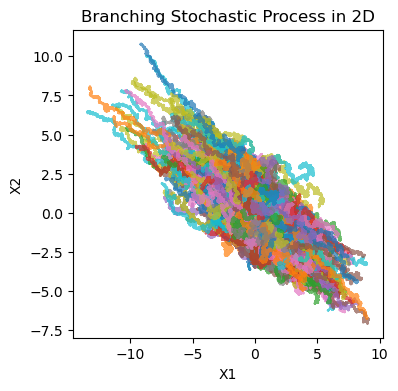

In [23]:
A = np.array([[0.5, -0.5], 
              [-0.5, 0.1]])
d = A.shape[0]

G = np.eye(d)
H = G@G.T

growth_rate = 0.25 # 0.75
# lambda_func = lambda X: 1.3 * np.exp(-0.01*np.linalg.norm(X))  # Decaying branching rate
# lambda_func = lambda X: growth_rate # 1.0 # 1.0 # Constant branching rate

N_init = 500
X0 = np.random.multivariate_normal(np.zeros(d), np.diag(np.ones(d)), N_init) # np.random.normal(0, 1, (N_init, A.shape[1]))
Nt = 15000
process = BranchingStochasticProcess(A, G, dt=0.0001, Nt=Nt, N_traj=N_init)
process.simulate(X0, growth_rate=growth_rate)
print("Final number of trajectories:", process.N_traj)
process.plot_trajectories(downsample=1)

In [24]:
process.save_file(f'data/4_27.h5', downsample_rate=1)

Data saved to data/4_27.h5


In [33]:
process_all = BranchingStochasticProcess(A, G, dt=0.0001, Nt=Nt, N_traj=N_init)
process_all.load_data('data/4_27.h5')
process_all.trajectories = process_all.trajectories[:10]
# process_all.growth_rate = growth_rate
# process_all.trajectories = process.trajectories.copy()
# process_all.save_file('data/700.h5', downsample_rate=1)

1500


In [38]:
N_experiments

10

In [53]:
process.trajectories[:10]

array([[[-4.44766529e-01,  8.77731160e-01],
        [-4.37156765e-01,  8.68860477e-01],
        [-4.32963814e-01,  8.72576738e-01],
        ...,
        [-7.01054080e-01,  3.35711207e+00],
        [-6.96155685e-01,  3.34952370e+00],
        [-6.94801282e-01,  3.34743700e+00]],

       [[ 1.32646438e+00, -6.47084631e-01],
        [ 1.32785997e+00, -6.31905469e-01],
        [ 1.32730836e+00, -6.39435093e-01],
        ...,
        [ 3.66303791e+00, -3.87974310e+00],
        [ 3.65110229e+00, -3.88941421e+00],
        [ 3.65710214e+00, -3.90989744e+00]],

       [[ 1.11676569e+00,  6.89729959e-01],
        [ 1.11083400e+00,  6.92408322e-01],
        [ 1.10587245e+00,  6.86458251e-01],
        ...,
        [-4.58954402e-01, -4.76309291e-01],
        [-4.52204554e-01, -4.80003774e-01],
        [-4.56336628e-01, -4.83628971e-01]],

       ...,

       [[-1.45763202e-03,  6.86696366e-01],
        [ 1.50335948e-04,  6.94327035e-01],
        [ 2.87847207e-03,  6.93516000e-01],
        ...,
     

In [98]:
N_experiments = 2
N_subsample = 1
trajectories = process.trajectories[:10].copy()
print(trajectories.shape)
marginal = np.zeros((N_subsample, N_experiments, d))

Nt = process.Nt // 10
t_sample = range(1, Nt, Nt // N_experiments)
ts_sample = process.ts[t_sample]
print(ts_sample)
i = 0
for ti in t_sample:
    N_subsampled = np.random.choice(np.arange(trajectories.shape[0]), N_subsample, replace=False)
    marginal[:, i, :] = process.trajectories[N_subsampled, ti, :]
    trajectories = np.delete(trajectories, N_subsampled, axis=0)
    i += 1
    
marginal, marginal.shape


(10, 15000, 2)
[0.0001 0.0751]


(array([[[-0.62432503, -2.39343372],
         [-0.27791717,  0.44842565]]]),
 (1, 2, 2))

1500


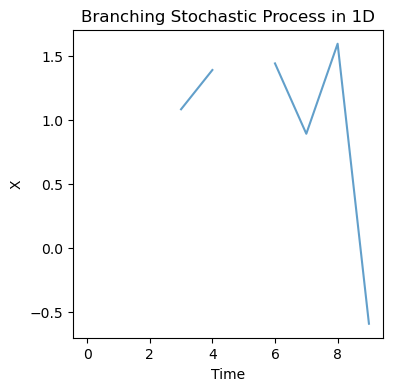

N traj 1 N time steps 10
iteration 0, running tolerance 2.0


ValueError: probabilities contain NaN

In [49]:
process2 = BranchingStochasticProcess(A, G, dt=0.0001, Nt=Nt, N_traj=N_init)
process2.ts = ts_sample
process2.trajectories = marginal
process2.Nt = len(ts_sample) + 1
process2.N_traj = marginal.shape[0]
process2.growth_rate = growth_rate

process2.plot_trajectories(downsample=1, dim=0)
process2.run_appex()

In [328]:
process2.A_est, process.A

(array([[-14.5499874 ,  -1.69569876],
        [ -0.57232999, -10.35579132]]),
 array([[0.5, 0.5],
        [0.5, 0.5]]))